IMDB reviews binary classification using **Long Short Memory Networks(LSTM)**

In [1]:
#Importing data
import tensorflow.keras
from tensorflow.keras.datasets import imdb

**Bag of Words**

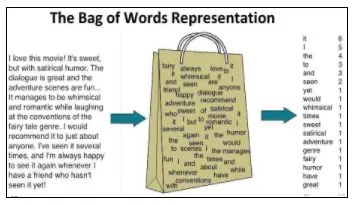

In [4]:
#Manually coding up the Bag of words algorithm
def vectorize(tokens):
    ''' This function takes list of words in a sentence as input 
    and returns a vector of size of filtered_vocab.It puts 0 if the 
    word is not present in tokens and count of token if present.'''
    vector=[]
    for w in filtered_vocab:
        vector.append(tokens.count(w))
    return vector
def unique(sequence):
    '''This functions returns a list in which the order remains 
    same and no item repeats.Using the set() function does not 
    preserve the original ordering,so i didnt use that instead'''
    seen = set()
    return [x for x in sequence if not (x in seen or seen.add(x))]
#create a list of stopwords.You can import stopwords from nltk too
stopwords=["to","is","a"]
#list of special characters.You can use regular expressions too
special_char=[",",":"," ",";",".","?"]
#Write the sentences in the corpus,in our case, just two 
string1="My name is Promit. I am a Machine Learning Enthusiast"
string2="Artificial intelligence is dominating the market"
#convert them to lower case
string1=string1.lower()
string2=string2.lower()
#split the sentences into tokens
tokens1=string1.split()
tokens2=string2.split()
print(tokens1)
print(tokens2)
#create a vocabulary list
vocab=unique(tokens1+tokens2)
print(vocab)
#filter the vocabulary list
filtered_vocab=[]
for w in vocab: 
    if w not in stopwords and w not in special_char: 
        filtered_vocab.append(w)
print(filtered_vocab)
#convert sentences into vectords
vector1=vectorize(tokens1)
print(vector1)
vector2=vectorize(tokens2)
print(vector2)

['my', 'name', 'is', 'promit.', 'i', 'am', 'a', 'machine', 'learning', 'enthusiast']
['artificial', 'intelligence', 'is', 'dominating', 'the', 'market']
['my', 'name', 'is', 'promit.', 'i', 'am', 'a', 'machine', 'learning', 'enthusiast', 'artificial', 'intelligence', 'dominating', 'the', 'market']
['my', 'name', 'promit.', 'i', 'am', 'machine', 'learning', 'enthusiast', 'artificial', 'intelligence', 'dominating', 'the', 'market']
[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


In [ ]:
#We can use the Bag of words model as provided by Sklearn

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
sentence_1="My name is Promit. I am a Machine Learning Enthusiast"
sentence_2="I am a student of Electronics and Communications Engineering"
 
 
 
CountVec = CountVectorizer(ngram_range=(1,1), # to use bigrams ngram_range=(2,2)
                           stop_words='english')
#transform
Count_data = CountVec.fit_transform([sentence_1,sentence_2])
 
#create dataframe
cv_dataframe=pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names())
print(cv_dataframe)

   communications  electronics  engineering  ...  machine  promit  student
0               0            0            0  ...        1       1        0
1               1            1            1  ...        0       0        1

[2 rows x 8 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Data Preprocessing

In [6]:
vocabulary_size = 5000
(x_train, y_train), (x_test, y_test)=imdb.load_data(num_words=vocabulary_size)

17473536/17464789 [==============================] - 0s 0us/step


In [7]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369,

In [ ]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

As we can see, each word has been integer encoded and  the postive labels encoded to 1, negative labels encoded to 0

In [ ]:
print('Loaded dataset with {} training samples, {} test samples'.format(len(x_train), len(x_test)))

Loaded dataset with 25000 training samples, 25000 test samples


In [8]:
#Looking at the reviews
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print('---review with words---')
print([id2word.get(i, ' ') for i in x_test[20]])
print('---label---')
print(y_train[0])

1654784/1641221 [==============================] - 0s 0us/step
---review with words---
['the', 'as', 'you', 'with', 'by', 'for', 'was', 'one', "everyone's", 'in', 'can', 'but', 'good', 'my', 'was', 'with', 'appearance', 'in', 'same', 'that', 'there', 'will', 'dvd', 'and', 'of', "you'll", 'br', 'as', 'you', 'there', 'will', 'her', 'and', 'handle', 'to', 'and', 'anything', 'predictable', 'when', 'it', 'life', 'who', 'of', 'night', 'was', 'although', 'that', 'spend', 'for', 'her', 'plot', 'great', "doesn't", 'into', 'his', "you're", 'may', 'good', 'time', 'five', 'dialogue', 'not', 'de', 'what', 'his', 'of', 'on', 'into', 'could', 'actor', 'this', 'is', 'money', 'too', 'to', 'it', 'time', 'themselves', 'of', 'you', 'there', 'plot', 'obviously', 'to', 'films', 'and', 'american', 'however', 'as', 'by', 'being', 'and', 'is', 'say', 'directing', 'there', 'appropriate', 'or', 'of', 'reviewers', 'and', 'plot', 'and', 'to', 'lost', 'is', 'time', 'telling', 'member', 'watch', 'killings', 'good', 

In [9]:
print('Maximum review length: {}'.format(
len(max((x_train + x_test), key=len))))

Maximum review length: 2697


In [10]:
print('Minimum review length: {}'.format(
len(min((x_test + x_test), key=len))))

Minimum review length: 14


In [11]:
from keras.preprocessing import sequence
max_words = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_words)
x_test = sequence.pad_sequences(x_test, maxlen=max_words)

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
embedding_size=40
model=Sequential()
model.add(Embedding(5000,embedding_size, input_length=max_words))
model.add(LSTM(100))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 40)           200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 32)                3232      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 259,665
Trainable params: 259,665
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

In [14]:
batch_size = 64
num_epochs = 4
X_valid, y_valid = x_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = x_train[batch_size:], y_train[batch_size:]
history=model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs)

Epoch 1/4
390/390 [==============================] - 246s 616ms/step - loss: 0.4658 - accuracy: 0.7784 - val_loss: 0.3724 - val_accuracy: 0.8750
Epoch 2/4
390/390 [==============================] - 236s 605ms/step - loss: 0.2803 - accuracy: 0.8863 - val_loss: 0.2378 - val_accuracy: 0.9062
Epoch 3/4
390/390 [==============================] - 236s 606ms/step - loss: 0.2374 - accuracy: 0.9086 - val_loss: 0.2502 - val_accuracy: 0.9062
Epoch 4/4
390/390 [==============================] - 237s 607ms/step - loss: 0.2055 - accuracy: 0.9214 - val_loss: 0.5999 - val_accuracy: 0.7188


**Evaluating Model Performace**

In [15]:
predictions=model.predict(x_test)

In [16]:
model.evaluate(x_test,y_test)

782/782 [==============================] - 113s 144ms/step - loss: 0.5601 - accuracy: 0.7278


[0.5600553750991821, 0.727840006351471]

In [17]:
import numpy as np
rounded_predictions=[]
for item in range(predictions.shape[0]):
  rounded_predictions.append(np.argmax(predictions[item]))